# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [ ]:
data['FUELTYPE'].unique() # getting the name of unique value

In [ ]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

In [ ]:
data['MODELYEAR'].value_counts()

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [ ]:
data.describe().T

# 2. Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [ ]:
data

# 3. EDA

In [ ]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'])
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

In [ ]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

In [ ]:
sns.boxenplot(data=data, x='ENGINESIZE', )

# Feature Engineering

Finding important features

In [64]:
correlation=data.corr()
correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


<AxesSubplot:>

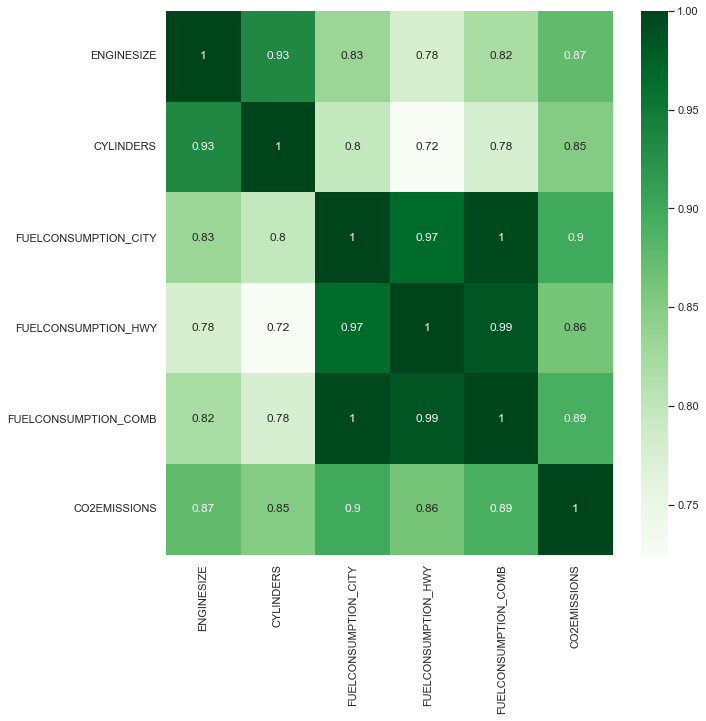

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
# Droping unnecessary ffeatures/column
data.drop(columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION',
          'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
data

## Detect Quartile and remove

In [ ]:
Q1=np.percentile(data.ENGINESIZE, 25, method='midpoint')
Q1

In [ ]:
Q3=np.percentile(data.ENGINESIZE, 75, method='midpoint')
Q3

In [ ]:
iQR=Q3-Q1
iQR

In [ ]:
Q1+1.5*iQR

In [ ]:
Q3-1.5*iQR

In [70]:
Outliers_index=np.where(data['ENGINESIZE']>Q1+1.5*iQR)
Outliers_index[0]

array([  12,   13,   18,   35,   69,   71,   73,   74,   75,  112,  173,
        174,  175,  176,  177,  178,  179,  180,  181,  182,  191,  192,
        193,  194,  195,  196,  224,  225,  227,  228,  241,  246,  283,
        285,  290,  298,  299,  300,  301,  304,  306,  313,  323,  349,
        371,  374,  391,  420,  448,  449,  451,  452,  457,  462,  473,
        474,  475,  476,  536,  538,  546,  584,  588,  633,  673,  730,
        731,  733,  737,  738,  750,  751,  752,  753,  754,  755,  759,
        766,  769,  771,  772,  776,  777,  778,  779,  838,  859,  860,
        909,  910,  911,  912,  922,  923,  924,  925,  926,  927,  928,
        940,  941,  993, 1005, 1007], dtype=int64)

In [71]:
# Droping Outliers_index
df1=data.drop(Outliers_index[0])

In [72]:
df1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [ ]:
# All Quartile
Q1=np.percentile(data.ENGINESIZE, 25)
Q1
Q2=np.percentile(data.ENGINESIZE, 50)
Q2
Q3=np.percentile(data.ENGINESIZE, 75)
Q3
Q4=np.percentile(data.ENGINESIZE, 100)
Q4
Q0=np.percentile(data.ENGINESIZE,0)
Q0

In [ ]:
data.describe().T